In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data_2020 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-qualitative-data-in-2020-Report.xlsx")
data_2021 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-ENDQs_qualitative-data-2021-Report.xlsx")
data_2022 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-Qualitative-ENDQs-2022-Report.xlsx")
data_2023 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-Qualtitative-ENDQ1&2_2023-Report.xlsx")

In [14]:
# Concatenate by rows
result_df = pd.concat([data_2020, data_2021, data_2022, data_2023], ignore_index=True)
# Assuming result_df is your concatenated DataFrame
result = result_df.iloc[:, :-3]
data = result.iloc[:, :8].join(result.iloc[:,-1], how='inner')

In [15]:
data

,Area,Course Code,Course,Semester,Year,Course Title,Course UniqueID,QuestionKey,Comments
0,Statistics,stk210_s1_2020,stk210,1.0,2020,STK 210 S1 2020,stk210_s1_2020,3132-0,-||all online and class activities||All past-p...
1,Statistics,stk210_s1_2020,stk210,1.0,2020,STK 210 S1 2020,stk210_s1_2020,4405-0,Alot easier to do.||better||Better than the pi...
2,Statistics,bme210_s1_2020,bme210,1.0,2020,BME 210 S1 2020,bme210_s1_2020,5076-0,/||Can finish chapters in my own time||Can lie...
3,Statistics,bme410_s1_2020,bme410,1.0,2020,BME 410 S1 2020,bme410_s1_2020,5076-0,Completed this module before the lockdown was ...
4,Statistics,stk110_s1_2020,stk110,1.0,2020,STK 110 S1 2020,stk110_s1_2020,5076-0,||A lot of this module was already online befo...
...,...,...,...,...,...,...,...,...,...
233,Statistics,wst133_s1_2023,wst133,1.0,2023,WST 133 S1 2023,wst133_s1_2023,33594-0,A lack of sufficient resources to study from.|...
234,Statistics,wst153_s1_2023,wst153,1.0,2023,WST 153 S1 2023,wst153_s1_2023,33594-0,I understand that the lecture has to stick to ...
235,Statistics,wst211_s1_2023,wst211,1.0,2023,WST 211 S1 2023,wst211_s1_2023,33594-0,Can't see anything during discussion class (th...
236,Statistics,wst212_s1_2023,wst212,1.0,2023,WST 212 S1 2023,wst212_s1_2023,33594-0,.||A lack of extra exercises and memo's aside ...


In [16]:
import pandas as pd

# Assuming 'data' is your DataFrame
new_data = []

for index, row in data.iterrows():
    course_code = row['Course']
    semester = row['Semester']
    year = row['Year']
    question_key = row['QuestionKey']
    
    # Check if 'Comments' is not NaN
    if pd.notna(row['Comments']):
        comments = row['Comments'].split('||')

        for comment in comments:
            new_data.append({'Course': course_code,'Semester':semester,'Year':year,'QuestionKey': question_key ,'Comments': comment.strip()})


In [17]:
new_df = pd.DataFrame(new_data)

In [18]:
new_df.to_excel('s.xlsx')

KeyboardInterrupt: 

In [ ]:
import re
from collections import Counter
import pandas as pd

def find_capital_words(text):
    if pd.isna(text) or not isinstance(text, str):
        return []  # Return an empty list for non-string or missing values
    
    pattern = r'\b[A-Z][a-z]*\b'
    capital_words = re.findall(pattern, text)
    return capital_words

# Apply the function to the 'Comments' column
new_df['Capitalized_Words'] = new_df['Comments'].apply(find_capital_words)

# Flatten the lists and count the occurrences
all_capital_words = [word for words_list in new_df['Capitalized_Words'] for word in words_list]
word_counts = Counter(all_capital_words)




In [ ]:
import re
from collections import Counter
import pandas as pd

def find_capital_words(text):
    if pd.isna(text) or not isinstance(text, str):
        return []  # Return an empty list for non-string or missing values
    
    pattern = r'\b[A-Z][a-z]*\b'
    capital_words = re.findall(pattern, text)
    return capital_words

# Apply the function to the 'Comments' column
new_df['Capitalized_Words'] = new_df['Comments'].apply(find_capital_words)

# Flatten the lists and count the occurrences
all_capital_words = [word for words_list in new_df['Capitalized_Words'] for word in words_list]
word_counts = Counter(all_capital_words)

# Create a DataFrame from the Counter
summary_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Export the summary to an Excel file
summary_df.to_excel('capitalized_words_summary.xlsx', index=False)


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

s = new_df['Comments']
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = word_tokenize
custom_spellchecker = SpellChecker()

# Contractions dictionary
contractions_dict = {
"tuts":"tutorial",
"pracs":"practical",
"labs":"laboratory",
"imroove":"improve",
"preparfed":"prepared",
"difficultto":"difficult to",
"understadable":"understandable",
"verry":"very",
"mpdules":"module",
"challanging":"challenging",
"questionair":"questionnaire",
"affraid":"afraid",
"interacte":"interact",
"semeter":"semester",
"ive":"i have",
"werent":"were not",
"preform":"perform",
"toget":"to get",
"hjave":"have",
"turioals":"tutorial",
"detial":"detail",
"problemes":"problem",
"lucturer":"lecturer",
"lactures":"lecture",
"sloving":"solving",
"begining":"beginning",
"activly":"actively",
"benefeicial":"beneficial",
"struggeling":"struggl",
"acessable":"accessible",
"undersanding":"understand",
"absolutley":"absolutely",
"connivence":"convenience",
"acces":"access",
"inn":":in",
"asses":"assess",
"imformative":"informative",
"leraning":"learn",
"schdules":"schedule",
"convinient":"convenient",
"exmaples":"example",
"explaing":"explaining",
"blckboard":"blackboard",
"collabarate":"collaborate",
"treffic":"traffic",
"materals":"material",
"reallu":"really",
"derivati":"derivative",
"subjetcs":"subject",
"blackbord":"blackboard",
"resorces":"resource",
"thurday":"thursday",
"reaources":"resource",
"traveltime":"travel time",
"comute":"commute",
"enoy":"enjoy",
"expatiation":"explanation",
"hvaing":"having",
"pase":"phase",
"lecturere":"lecturer",
"untill":"until",
"wasy":"easy",
"progam":"program",
"atrending":"attending",
"jy":"you",
"querry":"query",
"mnay":"may",
"wprk":"work",
"feedbac":"feedback",
"addedd":"added",
"somethigs":"something",
"empithy":"empathy",
"doin":"doing",
"communiation":"communication",
"diffuclt":"difficult",
"ons":"us",
"unfortunatly":"unfortunately",
"unnecassary":"unnecessary",
"expeienced":"experience",
"adresssed":"addressed",
"loadshadding":"loadshedding",
"inish":"finish",
"lotttttt":"lot",
"manyassignments":"many assignment",
"conducti":"conduct",
"upconect":"upconnect",
"loadsehedding":"loadshedding",
"asistance":"assistance",
"statisitics":"statistics",
"ohysical":"physical",
"noy":"not",
"slowely":"slowly",
"sceduling":"schedule",
"snd":"and",
"explanatius":"explanation",
"classess":"class",
"doingg":"doing",
"cusultation":"consultation",
"explanation":"explanation",
"questius":"question",
"sessius":"session",
"cusultatius":"consultation",
"activities":"activity",
"papers":"paper",
"homeworks":"homework",
"consulations":"consultation",
"assessments":"assessment",
"treffic":"traffic",
"fir":"for",
"kinda":"kind of",
"struggl":"struggle",
"alot":"a lot"
}

sigular_dict = {
    "classes":"class",
    "tests":"test",
    "examples":"example",
    "methods":"method",
    "lectures":"lecture",
    "lecturers":"lecturer",
    "homeworks":"homework",
    "helps":"help",
    "activities":"activity",
    "concepts":"concept",
    "worked":"work",
    "slides":"slide",
    "uploaded":"upload",
    "exercises":"exercise",
    "questions":"question",
    "answers":"answer",
    "conclusions":"conclusion",
    "datasets":"dataset",
    "grades":"grade",
    "tips":"tip",
    "tricks":"trick",
    "demands":"demand",
    "pretests":"pretest",
    "voices":"voice",
    "dislikes":"dislike",
    "concerns":"concern",
    "reads":"read",
    "benefited":"benefit",
    "tasks":"task",
    "papers":"paper",
    "explanations":"explanation",
    "notes":"note",
    "dished":"dish",
    "videos":"video",
    "uploaded":"upload",
    "sheets":"sheet",
    "topics":"topic",
    "books":"book",
    "needed":"need",
    "exams":"exam",
    "cramming":"cram",
    "summaries":"summary",
    "proofs":"proof",
    "laptops":"laptop",
    "devices":"device",
    "trees":"tree",
    "tutors":"tutor",
    "assignments":"assignment",
    "worksheets":"worksheet",
    "aspects":"aspect",
    "students":"student",
    "documents":"document",
    "practicals":"practical",
    "difficulties":"difficult",
    "modules":"module",
    "probabilities":"probability",
    "matrices":"matrix",
    "derivatives":"derivative",
    "attempts":"attempt",
    "mistakes":"mistake",
    "tested":"test",
    "dealt":"deal",
    "deals":"deal",
    "marks":"mark",
    "skips":"skip",
    "chapters":"chapter",
    "years":"year",
    "submissions":"submission",
    "skills":"skill",
    "provided":"provide",
    "sildes":"slide",
    "works":"work",
    "problems":"problem",
    "times":"time",
    "forms":"form",
    "connections":"connection",
    "consultations":"consultation",
    "sessions":"session",
    "makes":"make",
    "paced":"pace",
    "forces":"force",
    "weeks":"week",
    "recorded":"record",
    "studies":"study",
    "cases":"case",
    "struggl":"struggle",
    "prac":"practical",
    "saves":"save",
    "pracs":"practical",
    "practiced":"practise",
    "practised":"practise",
    "notational":"notation",
    "oher":"other",
    "oay":"okay",
    "assessed":"assess",
    "comments":"comment",
    "feels":"feel",
    "miised":"miss",
    "communicates":"communicate",
    "presentations":"presentation",
    "pausing":"pause",
    "moderators":"moderator",
    "assigments":"assignment",
    "communicating":"communicate",
    "tutorials":"tutorial"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def correct_spelling(text, corrections_dict=contractions_dict):
    words = text.split()
    corrected_words = [corrections_dict.get(word, word) for word in words]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, ' ', text)
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def singularize_words(text, singular_dict):
    words = text.split()
    singularized_words = [singular_dict.get(word, word) for word in words]
    singularized_text = ' '.join(singularized_words)
    return singularized_text


def preprocess_text(text):
    text = text.lower()
    text = correct_spelling(text)
    text = remove_special_characters(text)
    #remove stop words
    additional_words = ['da','terminator','ms','pace','ta','ac','za','loqd','dis','trst','cbts','itsi','miebooks','ya','ms','neethlings','neethling','dr','wah','kleyn','e','na','ie','isnt','miss ','ane','cap','stk','sfts','burger','kraamwinkel','inger','fletcher','prof','pretoria','university','lindo','christene','n','nothing','none','bcom','niks','comment','non','applicable','u','z','nagar','bme','wst','stc','acc','sci','up','llb','stem','sir','ntn','mrs','le','coster','madam','usualky','thou','couldve','muslim','cultures','ramadan','preparfed','nina','masters','difficultto','tukstube','sssignments','actuary','phd','memose','trecky','wendy','ozark','thuto','najmeh','pedagogy','understadable','understandng','verry','liberating','calcute','undesrtandable','ams','kraamwinkle','mr','magagula','zl','coz','b','retief',  'makgai','cleo','fabris','rotelli','tuks','sir','hatfield','swaziland','eswatini','fletcher','google','wikipedeia','qwaqwa','lusaka','south','africa','merensky','zoom','res','wi','fi','minister','residence','swanepoel','universities','judy','paul','van','staden','ehlers','ehler','doctor','pearson','christine','khan','york','mars','hackettstown','bayer','ferreria',
                        'mam','crafford','merwe','mister','priyanka','didi','salomi','sirs','lindi','mahloromela','otieno','arnold','stander','fereirra','ferrreira','luke','farreira','morden','cambridge','rene','seite','mrs','michelle','klerk','numbas','divan','mamelodi','maribe','iketle','maharela','reyneke','coetser','limpopo','ratief','rian','waal','de','botes','jocelyn',
                        'mazarura','ansie','smit','kabelo','derks','iena','dirks','ferreira','johan','renate','thiede','gao','skhosana','coester','cloester','arminn','brenda','malela','oduol','chimamanda','ngozi','adichie','tristan','lebogang','evernice','fletchers','macdoul','alexander','kelbrick','loina','linda']
    stopwords_list = "you'll,mustn't,it's,mustn,hasn't,didn't,needn't,should've,shouldn't,isn't,you're,that'll,wasn't,couldn't,shan,you've,shan't,doesn't,ma,mightn,wouldn't,won't,haven't,you'd,hadn't,y,weren't,mightn't,needn,don't,o,aren't,she's,u,a,s,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain,t,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren,t,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,mon,c,s,came,can,can,t,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn,t,course,currently,definitely,described,despite,did,didn,t,different,do,does,doesn,t,doing,don,t,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn,t,happens,hardly,has,hasn,t,have,haven,t,having,he,he,s,hello,help,hence,her,here,here,s,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,http,hopefully,how,howbeit,however,i,d,i,ll,i,m,i,ve,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn,t,it,it,d,it,ll,it,s,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let,s,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,proftimnoakes,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn,t,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,s,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that,s,thats,the,their,theirs,them,themselves,then,thence,there,there,s,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they,d,they,ll,they,re,rt,they,ve,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasn,t,way,we,we,d,we,ll,we,re,we,ve,welcome,well,went,were,weren,t,what,what,s,whatever,when,whence,whenever,where,where,s,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who,s,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won,t,wonder,would,would,wouldn,t,yes,yet,you,you,d,you,ll,you,re,you,ve,your,yours,yourself,yourselves,zero".split(',')

    text = " ".join([word for word in str(text).split() if word not in stopwords_list])
    text = " ".join([word for word in str(text).split() if word not in additional_words])
    text = singularize_words(text,sigular_dict)
    return text
s['clean_text'] = s.apply(preprocess_text)
d = s['clean_text']

C:\Users\jduto\AppData\Local\Temp\ipykernel_9852\3181165302.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)


In [ ]:
import pandas as pd
from collections import Counter

# Assuming 'd' is your preprocessed text column
word_counts = Counter(' '.join(d).split())

# Create a DataFrame from the word counts
df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Save the DataFrame to an Excel file
df.to_excel('word_counts.xlsx', index=False)


In [ ]:
# Specify the file path where you want to save the text file
output_file_path = "dataset.txt"

# Open the file in write mode and write each processed document on a new line
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in d:
        if document.strip():  # Check if the document has content
            output_file.write(document + "\n")  # Write the document to the file with a newline character



In [ ]:
#java -jar jar/STTM.jar -model BTM -corpus dataset/data.txt -ntopics 200 -name btm

SyntaxError: invalid syntax (821374690.py, line 1)

In [ ]:
# Specify the file path where you want to save the text file
output_file_path = "dataset.txt"

# Open the file in write mode and write each processed document on a new line
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in d:
        # Remove the check for non-empty content
        output_file.write(str(document) + "\n")  # Write the document to the file with a newline character


Dataset:

50 topics:
Coherence score: [1.108995497212707,1.149489500713558,1.1082496094725887,1.128880613192234,1.1582425111764811,1.140906173306414, 1.1628879822556242,1.146466459431846,1.1660565205213715,1.14479414819964]

100 topics:
Coherence score: [1.2139654407840574,1.1488427772048972,1.188818195624534,1.2152926336741332,1.181692547820417,1.2029138298733582,1.2104569095851734,1.169518106935836,1.232384322638127,1.1530367436748115]

110 topics:
Coherence score: [1.1974135543414266, 1.2361009358972628,1.2041453294502809, 1.1670613805601109,1.1569998775724766,1.1937827366709617,1.2167494179344596, 1.163011310909896, 1.2363892585905716,1.151150542671881]




Data_set:
50 topics:
Coherence score: [1.027372637673008,1.0479992226326638,1.2096494581962858,1.0903574141893613,1.0279488946064566,1.069162590997054,1.1109172661053464,1.0730898852349129,1.0844228496918569,0.9928458661247062]

100 topics:
Coherence score: [1.142871190082546,1.1226817158079148,1.0920394435665075,1.0879620292244374,1.1143888051561215,1.1436205755502455,1.0374828707475323,1.0877520960155629,1.1248882257236925,1.0923747487021045]

150 topics:
Coherence score: [1.1921596205441318,1.129507536928258,1.1204129208195397,1.1996905431786735,1.1731137465634758,1.1321303747648983,1.1959027731306129,1.1584180855261599,1.1504996823542415,1.1466239653657997]

200 topics:
Coherence score:
[1.2621276343338461,1.245272373173564,1.2452359763799488,1.214937281344563,1.2835940115006743,1.2649437684096718,1.2478993716130715,1.2572921564326762,1.2638696691257056,1.2132096622461799]

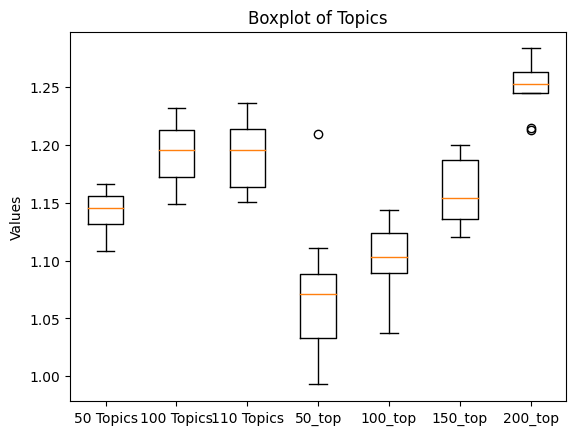

In [ ]:
topics_50 = [1.108995497212707,1.149489500713558,1.1082496094725887,1.128880613192234,1.1582425111764811,1.140906173306414, 1.1628879822556242,1.146466459431846,1.1660565205213715,1.14479414819964]
topics_100 = [1.2139654407840574,1.1488427772048972,1.188818195624534,1.2152926336741332,1.181692547820417,1.2029138298733582,1.2104569095851734,1.169518106935836,1.232384322638127,1.1530367436748115]
topics_110 = [1.1974135543414266, 1.2361009358972628,1.2041453294502809, 1.1670613805601109,1.1569998775724766,1.1937827366709617,1.2167494179344596, 1.163011310909896, 1.2363892585905716,1.151150542671881]

top_50 = [1.027372637673008,1.0479992226326638,1.2096494581962858,1.0903574141893613,1.0279488946064566,1.069162590997054,1.1109172661053464,1.0730898852349129,1.0844228496918569,0.9928458661247062]
top_100 = [1.142871190082546,1.1226817158079148,1.0920394435665075,1.0879620292244374,1.1143888051561215,1.1436205755502455,1.0374828707475323,1.0877520960155629,1.1248882257236925,1.0923747487021045]
top_150 = [1.1921596205441318,1.129507536928258,1.1204129208195397,1.1996905431786735,1.1731137465634758,1.1321303747648983,1.1959027731306129,1.1584180855261599,1.1504996823542415,1.1466239653657997]
top_200 = [1.2621276343338461,1.245272373173564,1.2452359763799488,1.214937281344563,1.2835940115006743,1.2649437684096718,1.2478993716130715,1.2572921564326762,1.2638696691257056,1.2132096622461799]

plt.boxplot([topics_50, topics_100, topics_110,top_50,top_100,top_150,top_200], labels=['50 Topics', '100 Topics', '110 Topics','50_top','100_top','150_top','200_top'])
plt.title('Boxplot of Topics')
plt.ylabel('Values')
plt.show()

In [ ]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file


In [ ]:
# Specify the path to your text file
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm.vocabulary"

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    file_contents = file.read()
dtt = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm.theta"
with open(dtt, "r", encoding="utf-8") as file:
    theta_contents = file.readlines()
matrix = []

for element in theta_contents:
    # Split the element into individual values
    element_values = element.split()
    # Convert values to floats and append as a row to the matrix
    matrix.append([float(value) for value in element_values])

# Convert the matrix to a NumPy array for further manipulation if needed
matrix_array = np.array(matrix, dtype=float)




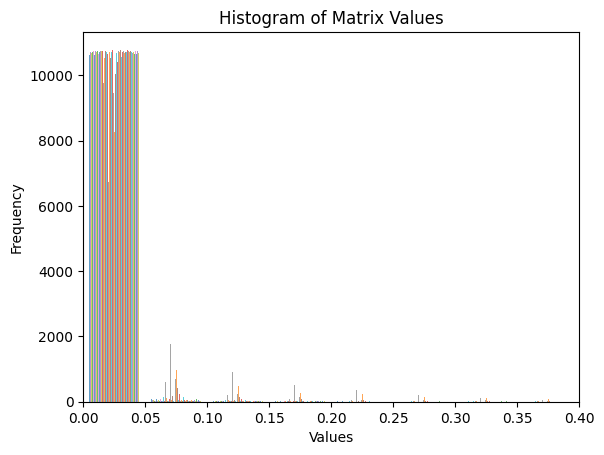

In [ ]:
import matplotlib.pyplot as plt


# Create a histogram with 20 bins
plt.hist(matrix_array, bins=20, alpha=0.7)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.xlim(0, 0.4)  # Specify the x-axis limits (min, max)
#plt.ylim(0, 50)  # Specify the y-axis limits (min, max)

# Show the histogram
plt.show()

In [ ]:
np.sum(matrix_array < 0.05)

2116939

In [ ]:
len(matrix_array)*200

2156200

In [ ]:
np.sum(matrix_array > 0.05)/(len(matrix_array)*200)

0.018208422224283462

In [ ]:
new_df['processed comments'] = d
# Assuming 'new_df' is your DataFrame, and 'processed comments' is the column you're checking
new_df = new_df[new_df['processed comments'].str.strip() != '']


In [ ]:
import numpy as np

# Assuming doc_topic_matrix is your document-to-topic matrix
# Each row represents a document, and each column represents a topic
# threshold is the value above which a topic is considered allocated to a document

def allocate_topics(doc_topic_matrix, threshold):
    allocated_topics = []

    for doc_id, doc_topics in enumerate(doc_topic_matrix):
        assigned_topics = [topic_id for topic_id, topic_prob in enumerate(doc_topics) if topic_prob > threshold]
        allocated_topics.append(assigned_topics)

    return allocated_topics


threshold = 0.05
allocated_topics = allocate_topics(matrix_array, threshold)




In [ ]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define your stop words
stop_words = set(stopwords.words('english'))

def generate_one_word_summary_from_text(text):
    sentences = sent_tokenize(text)
    
    # Preprocess the sentences
    preprocessed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        tagged_words = pos_tag(words)  # Perform POS tagging
        nouns = [word for word, pos in tagged_words if pos.startswith('N')]  # Retain only nouns
        filtered_words = [word for word in nouns if word.isalnum() and word not in stop_words]
        preprocessed_sentences.append(filtered_words)
    
    # Calculate word frequencies
    word_frequencies = {}
    for sentence in preprocessed_sentences:
        for word in sentence:
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    
    # Check if word_frequencies dictionary is empty
    if not word_frequencies:
        return None
    
    # Sort the word frequencies and select the most frequent word
    top_word = max(word_frequencies, key=word_frequencies.get)
    
    return top_word




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def group_sentences_by_topics(sentence_topic_matrix, threshold):
    topic_sentence_mapping = {}

    for sentence_id, sentence_topics in enumerate(sentence_topic_matrix):
        assigned_topics = [topic_id for topic_id, topic_prob in enumerate(sentence_topics) if topic_prob > threshold]

        for topic_id in assigned_topics:
            if topic_id not in topic_sentence_mapping:
                topic_sentence_mapping[topic_id] = []
            topic_sentence_mapping[topic_id].append(sentence_id)

    return topic_sentence_mapping

threshold = 0.05
topic_sentence_mapping = group_sentences_by_topics(matrix_array, threshold)



In [ ]:
# Function to get a one-word summary for each topic number
def get_topic_summaries(matrix_array, threshold):
    # Group sentences by topics
    topic_sentence_mapping = group_sentences_by_topics(matrix_array, threshold)
    
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

    # Iterate through each topic
    for topic_id, sentence_ids in topic_sentence_mapping.items():
        # Combine sentences into one text
        sentences = [new_df['processed comments'].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
        
        # Generate one-word summary for the topic
        summary = generate_one_word_summary_from_text(text)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Set the threshold
threshold = 0.05

# Get topic summaries
topic_summaries = get_topic_summaries(matrix_array, threshold)



In [ ]:
new_df['allocated_topics'] = allocated_topics
# Assuming 'Assigned_Topics' is a column of lists
new_df['topic_summaries'] = new_df['allocated_topics'].apply(lambda topics: [topic_summaries[topic] for topic in topics])
new_df['topic_summaries'] = new_df['topic_summaries'].apply(lambda x: list(set(x)))


In [ ]:
# Get unique values from dictionary values
unique_summaries = list(set(topic_summaries.values()))

print(unique_summaries)

['home', 'face', 'slide', 'activity', 'question', 'step', 'job', 'discussion', 'lot', 'code', 'module', 'assessment', 'assignment', 'class', 'style', 'form', 'work', 'recordings', 'mark', 'motivation', 'lecturer', 'quizzes', 'tutor', 'probability', 'candy', 'data', 'theory', 'textbook', 'deadlines', 'study', 'lecture', 'online', 'skill', 'session', 'test', 'video', 'problem', 'project', 'student', 'time']


In [ ]:
new_df

,Course,Semester,Year,QuestionKey,Comments,Capitalized_Words,processed comments,allocated_topics,topic_summaries
1,stk210,1.0,2020,3132-0,all online and class activities,[],online class activity,"[34, 77, 101, 119]","[test, lecture]"
2,stk210,1.0,2020,3132-0,"All past-papers, online assessments and homewo...","[All, Very]",past paper online assessment homework extremel...,"[7, 43, 74, 77, 188]","[test, work, lecture]"
3,stk210,1.0,2020,3132-0,Assesment tasks contributed to my learning and...,[Assesment],assesment task contributed learning development,"[8, 9, 58, 66, 77, 128]","[session, module, test, slide, work]"
4,stk210,1.0,2020,3132-0,Attending and consultations ..None of the above,"[Attending, None]",attending consultation,"[19, 101, 119]","[test, lecture, tutor]"
5,stk210,1.0,2020,3132-0,Attending class was crucial in order to unders...,"[Attending, The]",attending class crucial order understand modul...,"[22, 77]",[test]
...,...,...,...,...,...,...,...,...,...
11929,wst312,1.0,2023,33594-0,The lecturer was not accommodating and sensiti...,"[The, Muslim, Ramadan, The, When, Other]",lecturer accommodating sensitive student fasti...,[199],[class]
11930,wst312,1.0,2023,33594-0,The lecturer was not considerate to fix practi...,[The],lecturer considerate fix practical faults side,"[18, 32, 90, 117, 198]","[test, student, study, skill]"
11931,wst312,1.0,2023,33594-0,We did not class tests before the semester tes...,"[We, Had]",class test semester test mark semester test pl...,"[77, 132, 135, 192]","[test, class]"
11932,wst312,1.0,2023,33594-0,We were not given memos for anything and were ...,"[We, It]",memos forced peers extremely difficult bad soc...,"[2, 34, 58]","[step, lecture, slide]"
